In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
pd.options.display.max_columns = None

In [189]:
train_og = pd.read_csv('data/training_set_census.csv', skipinitialspace = True)
test_og = pd.read_csv('data/testing_set_census.csv', skipinitialspace = True)

In [190]:
train = train_og.copy()

In [191]:
test = test_og.copy()

In [192]:
print(train.shape)
test.shape

(200000, 42)


(50000, 41)

In [193]:
train.head(1)

,Unnamed: 0,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_parttime_employment_stat,capital_gains,capital_losses,dividend_from_Stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,d_household_family_stat,d_household_summary,migration_msa,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,num_person_Worked_employer,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,0,23,Private,43,22,Some college but no degree,0,College or university,Never married,Education,Adm support including clerical,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Peru,Peru,United-States,Native- Born in the United States,0,Not in universe,2,30,95,0


In [194]:
target = train['income_level']

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Unnamed: 0                        200000 non-null  int64 
 1   age                               200000 non-null  int64 
 2   class_of_worker                   200000 non-null  object
 3   industry_code                     200000 non-null  int64 
 4   occupation_code                   200000 non-null  int64 
 5   education                         200000 non-null  object
 6   wage_per_hour                     200000 non-null  int64 
 7   enrolled_in_edu_inst_lastwk       200000 non-null  object
 8   marital_status                    200000 non-null  object
 9   major_industry_code               200000 non-null  object
 10  major_occupation_code             200000 non-null  object
 11  race                              200000 non-null  object
 12  hi

In [196]:
train = train.replace('Not in universe',np.nan)

In [206]:
train.isnull().sum()

age                              0
industry_code                    0
occupation_code                  0
education                        0
wage_per_hour                    0
marital_status                   0
major_industry_code              0
race                             0
hispanic_origin                  0
sex                              0
full_parttime_employment_stat    0
capital_gains                    0
capital_losses                   0
dividend_from_Stocks             0
tax_filer_status                 0
d_household_family_stat          0
d_household_summary              0
migration_msa                    0
migration_reg                    0
migration_within_reg             0
live_1_year_ago                  0
num_person_Worked_employer       0
country_father                   0
country_mother                   0
country_self                     0
citizenship                      0
business_or_self_employed        0
veterans_benefits                0
weeks_worked_in_year

In [198]:
cols_to_drop = ['Unnamed: 0','migration_sunbelt','state_of_previous_residence','region_of_previous_residence',
                'year','member_of_labor_union','reason_for_unemployment','fill_questionnaire_veteran_admin',
               'class_of_worker','family_members_under_18','enrolled_in_edu_inst_lastwk','major_occupation_code']
train.drop(columns = cols_to_drop, inplace = True)

In [199]:
cols = train.columns.tolist()

In [200]:
cat_cols = train.select_dtypes(include = 'object').columns.to_list()
num_cols = train.select_dtypes(include = 'int64').columns.to_list()

<AxesSubplot:>

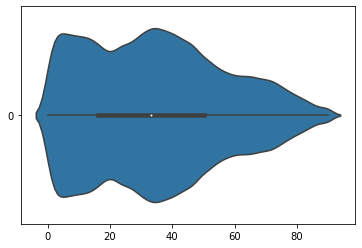

In [201]:
sns.violinplot(data = train['age'], orient = 'h')

### There seems to be a dip around age 20.

### Changed hispanic origin for people whose parent's countries are any of the following:
### Puerto-rico, Mexico, Haiti, Dominican-Republican

In [202]:
train.loc[(train.country_father == 'Cuba') | (train.country_mother == 'Cuba'),'hispanic_origin']='Cuban'
train.loc[(train.country_father == 'Dominican-Republic') | (train.country_mother == 'Dominican-Republic'),'hispanic_origin']='Other Spanish'
train.loc[(train.country_father == 'Haiti') | (train.country_mother == 'Haiti'),'hispanic_origin']='Other Spanish'
train.loc[(train.country_father == 'Mexico') | (train.country_mother == 'Mexico'),'hispanic_origin']='Mexican (Mexicano)'

train.hispanic_origin.fillna('All other', inplace = True)

In [203]:
def migration_data_cleaning():
    for col in cols:
        if 'migration' in col:
            train[col] = train[col].replace(['?',np.nan,'Not in universe'],'Nonmover')

migration_data_cleaning()

In [204]:
train.dropna(subset = ['country_father','country_mother','country_self'], inplace = True)

<AxesSubplot:xlabel='income_level', ylabel='age'>

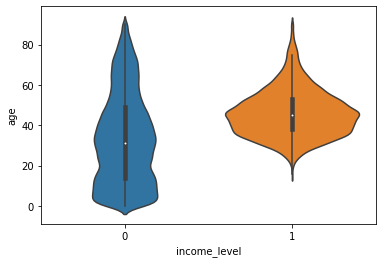

In [205]:
sns.violinplot(data = train, x = 'income_level', y = 'age')

In [207]:
train.isnull().sum()

age                              0
industry_code                    0
occupation_code                  0
education                        0
wage_per_hour                    0
marital_status                   0
major_industry_code              0
race                             0
hispanic_origin                  0
sex                              0
full_parttime_employment_stat    0
capital_gains                    0
capital_losses                   0
dividend_from_Stocks             0
tax_filer_status                 0
d_household_family_stat          0
d_household_summary              0
migration_msa                    0
migration_reg                    0
migration_within_reg             0
live_1_year_ago                  0
num_person_Worked_employer       0
country_father                   0
country_mother                   0
country_self                     0
citizenship                      0
business_or_self_employed        0
veterans_benefits                0
weeks_worked_in_year

# Work below